<a href="https://colab.research.google.com/github/JGuerrero08/Integraci-n-de-Datos-y-Prospectiva/blob/main/Caracterizaci%C3%B3n_VA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Riesgo Operacional** - EVERGREEN
En este espacio de trabajo, se plantea cómo caso de estudio, el analisis de los riesgos asociados a las opercaiones del negocio de las Naviera Evergree. Esta Naviera opera en 240 puertos al rededor del mundo utilizando 150 buques por el canal de Panamá.
Los riesgos a los cuales estan expuestas la Naviera estan relacionados con la lógistica portuaria, frente a la carag y descarga de contenedores. De esta manera este riesgo operacional se describe a través de 2 variables:
* Frecuencia: Indica el número de contenedores que se quedan en Tierra por semana (Tiempo).
* Severidad (KUSD): Indica el costo de solucionar cada evento de riesgo.
Es importante mencionar que el producto entre la severtidad y la frecuencia da como resultado la distribución de las pérdidas y es precisamente que se hará la caracterización de estra distribución utilizando las medidas de tendencia central (Media y Desviación) y las medidas de dispersión (Coeficiente de asimetría, Kurtosis).



In [10]:
import numpy as np
import pandas as pd
import seaborn as sns     #Esta libreria para el trabajo estadistico
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
nxl="/content/drive/MyDrive/Integración de Datos/Base de Datos/1. RiesgoOperacional_EVERGREEEN.xlsx"
XDB=pd.read_excel(nxl,sheet_name=0)
XDB.head(10)




,Semana,Transacción Mensuales (Mes),Valor Transado (MUSD),Eventos (Mes),Severidad (KUSD),Riesgo
0,1,44,27.145501,4,2.867141,Riesgo de Error en Reportes No Críticos
1,2,194,68.447342,20,6.420941,Riesgo Regulatorio
2,3,217,20.111928,22,2.174181,Riesgo de Error en Reportes No Críticos
3,4,278,60.008094,28,5.816689,Riesgo Logístico y de Cadena de Suministro
4,5,286,63.007004,31,6.375786,Riesgo Regulatorio
5,6,164,11.047362,15,1.151032,Riesgo de Equipamiento Secundario
6,7,47,11.794715,5,1.293013,Riesgo de Equipamiento Secundario
7,8,366,697.729253,36,65.072471,Riesgo Ambiental
8,9,39,117.075199,4,12.138389,Riesgo de Imagen Corporativa
9,10,301,16.822844,32,1.645884,Riesgo de Equipamiento Secundario


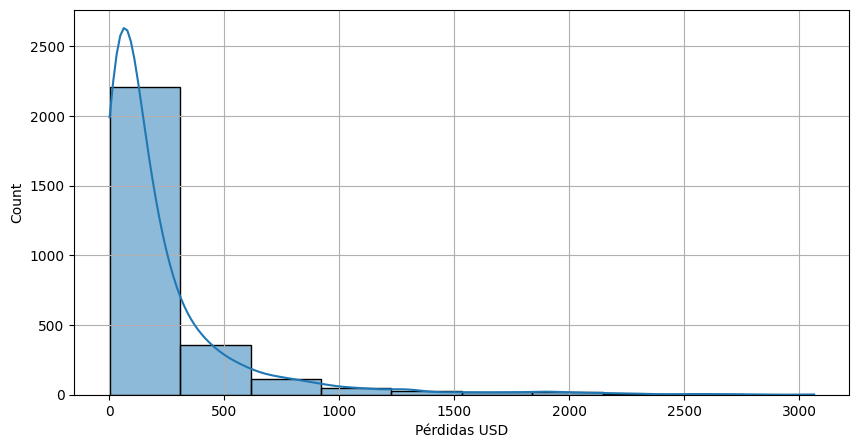

In [17]:
#Procedemos con la construcción de la distribución agregada de las peérdidas
Freq=XDB.iloc[:,3]
Sev=XDB.iloc[:,4]
LDA =Freq*Sev

# Se procede con la construcción de la gráfica de la distribución agregada de las pérdidas
plt.figure(figsize=(10,5))
sns.histplot(LDA,bins=10,kde=True)
plt.xlabel('Pérdidas USD')
plt.grid()    #Mostrar cuadricula
plt.show()